trying to solve Klotski puzzle from slides

initial state:

[2 8 3]
[1 6 4]
[7 _ 5]

final state:

[1 2 3]
[8 - 4]
[7 6 5]

In [40]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [41]:
PUZZLE_SHAPE = (3, 3)

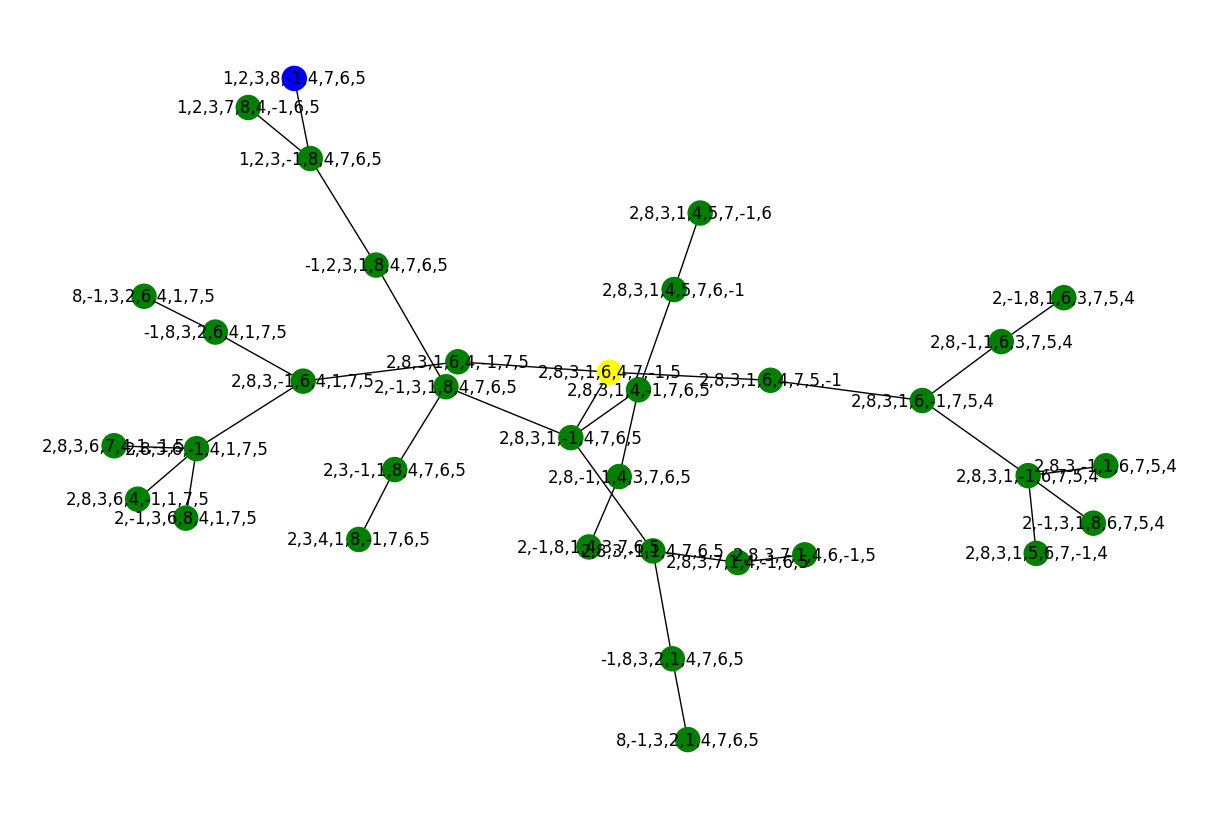

In [46]:
def node2matrix(node): # string to matrix
    return np.array(node.split(','), dtype= np.int32).reshape(PUZZLE_SHAPE)

def matrix2node(matrix): # matrix to string
    return ','.join(str(m) for m in matrix.flatten())

def explore(node, f: 'list', v: 'set', s: 'nx.Graph'):
    matrix = node2matrix(node)
    empty = np.where(matrix == -1)
    empty = (empty[0][0], empty[1][0])

    if empty[0] > 0:
        #print(f'try up')
        m = matrix.copy()
        slide = m[empty[0] - 1, empty[1]]
        m[empty[0] - 1, empty[1]] = -1
        m[empty] = slide
        new_node = matrix2node(m)
        if not v.__contains__(new_node):
            v.add(new_node)
            f.append(new_node)
            s.add_node(new_node)
        if not s.has_edge(node, new_node): s.add_edge(node, new_node)
        #else: print('already present')
    #else: print(f'up there is a wall')

    if empty[0] < PUZZLE_SHAPE[0] - 1:
        #print(f'try down')
        m = matrix.copy()
        slide = m[empty[0] + 1, empty[1]]
        m[empty[0] + 1, empty[1]] = -1
        m[empty] = slide
        new_node = matrix2node(m)
        if not v.__contains__(new_node):
            v.add(new_node)
            f.append(new_node)
            s.add_node(new_node)
        if not s.has_edge(node, new_node): s.add_edge(node, new_node)
        #else: print('already present')
    #else: print(f'down there is a wall')

    if empty[1] > 0:
        #print(f'try left')
        m = matrix.copy()
        slide = m[empty[0], empty[1] - 1]
        m[empty[0], empty[1] - 1] = -1
        m[empty] = slide
        new_node = matrix2node(m)
        if not v.__contains__(new_node):
            v.add(new_node)
            f.append(new_node)
            s.add_node(new_node)
        if not s.has_edge(node, new_node): s.add_edge(node, new_node)
        #else: print('already present')
    #else: print(f'left there is a wall')

    if empty[1] < PUZZLE_SHAPE[1] - 1:
        #print(f'try right')
        m = matrix.copy()
        slide = m[empty[0], empty[1] + 1]
        m[empty[0], empty[1] + 1] = -1
        m[empty] = slide
        new_node = matrix2node(m)
        if not v.__contains__(new_node):
            v.add(new_node)
            f.append(new_node)
            s.add_node(new_node)
        if not s.has_edge(node, new_node): s.add_edge(node, new_node)
        #else: print('already present')
    #else: print(f'right there is a wall')

    return

START = '2,8,3,1,6,4,7,-1,5'
STOP = '1,2,3,8,-1,4,7,6,5'

frontier = []
visited = set()
sspace = nx.Graph()

visited.add(START)
sspace.add_node(START)
frontier.append(START)

while len(frontier) > 0 and not visited.__contains__(STOP):
    
    ###### is this Depth first ? anyway, in this case it doesn't perform (it still works tho)
    
    #slide = frontier[-1]
    #frontier = frontier[:-1]
    
    ######
    
    ###### is this Breadth first ?
    
    slide = frontier[0]
    frontier = frontier[1:]
    
    ######
    
    explore(slide, frontier, visited, sspace)
    
plt.figure(figsize=(12, 8))
node_color = ["yellow" if n == START else "blue" if n == STOP else "green" for n in sspace]
nx.draw(sspace, node_color= node_color, with_labels= True, font_color='black')

In [47]:
path = nx.shortest_path(sspace, START, STOP)
for n in path: print(node2matrix(n))

[[ 2  8  3]
 [ 1  6  4]
 [ 7 -1  5]]
[[ 2  8  3]
 [ 1 -1  4]
 [ 7  6  5]]
[[ 2 -1  3]
 [ 1  8  4]
 [ 7  6  5]]
[[-1  2  3]
 [ 1  8  4]
 [ 7  6  5]]
[[ 1  2  3]
 [-1  8  4]
 [ 7  6  5]]
[[ 1  2  3]
 [ 8 -1  4]
 [ 7  6  5]]
